# Proyecto portafolio de inversión para un fondo de la universidad.

En este proyecto se creará un portafolio que pueda generar el 200% de rendimiento a 4 años para la universidad del hijo de un inversionista.

## Objetivos

### Objetivo principal
- El objetivo **principal** será ver si en las simulaciones que se crean con un portafolio de algunos activos financieros se puede lograr un 200% de rendimiento a 4 años para que el inversionista pueda sostener los gastos de universidad de su hijo.
- Objetivos secundarios
    - El **primer** objetivo es poder generar al menos 10,000 escenarios en los que se proyecten los rendimientos esperados para 4 años.
    - El **segundo** objetivo es poder, a partir de los rendimientos esperados generar en cada uno de los escenarios en los 4 años los precios de cierre para proyectar as ganancias posibles si se abriera el portafolio el dia de hoy 23/04/2022.
    
Todos los objetivos se harán dos veces para probar que tan bueno es el modelo de predicción, primero lo haremos de 2018 al dia de hoy que es 23/04/2022 y después de el final de esa misma fecha 4 años después.

In [2]:
import pandas_datareader as web
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Descargaremos los datos para las acciones de los activos mas famosos del momento y para un indice.

In [3]:
names = ["FB", 'MSFT', 'AMZN', 'TSLA', '^GSPC']
#Fechas en "yyyy-mm-dd"
start = "2013-01-01"
end = "2018-01-01"
def getClose(name, start, end):
    return web.DataReader(name, "yahoo", start, end)["Adj Close"]
data2 = getClose(names, start, end)
data2.head()

Symbols,FB,MSFT,AMZN,TSLA,^GSPC
Date,,,,,
2013-01-02,28.000000,22.940655,257.309998,7.072,1462.420044
2013-01-03,27.770000,22.633333,258.480011,6.954,1459.369995
2013-01-04,28.760000,22.209742,259.149994,6.880,1466.469971
2013-01-07,29.420000,22.168213,268.459991,6.868,1461.890015
2013-01-08,29.059999,22.051931,266.380005,6.736,1457.150024


Veamos como se ve esta gráfica

In [4]:
data2.describe()

Symbols,FB,MSFT,AMZN,TSLA,^GSPC
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000
mean,93.275441,44.820363,554.954266,43.258712,2035.665989
std,42.854103,14.365545,263.588478,15.167120,275.924964
min,22.900000,21.977177,248.229996,6.582000,1457.150024
25%,62.535000,34.217953,322.065002,37.733999,1863.080017
50%,86.669998,41.750664,439.390015,43.916000,2050.629883
75%,123.375000,53.224333,767.180023,50.601000,2168.760010
max,183.029999,82.383949,1195.829956,77.000000,2690.159912


<AxesSubplot:xlabel='Date'>

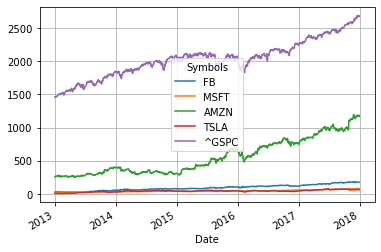

In [8]:
data2.plot(grid=True)

Observamos que algunos activos no han tenido un crecimiento tan grande como los 2 principales que son amazon y el indice $ S&P500 $. Ahora queremos saber que tal se ve su distribución.

array([[<AxesSubplot:title={'center':'FB'}>,
        <AxesSubplot:title={'center':'MSFT'}>],
       [<AxesSubplot:title={'center':'AMZN'}>,
        <AxesSubplot:title={'center':'TSLA'}>],
       [<AxesSubplot:title={'center':'^GSPC'}>, <AxesSubplot:>]],
      dtype=object)

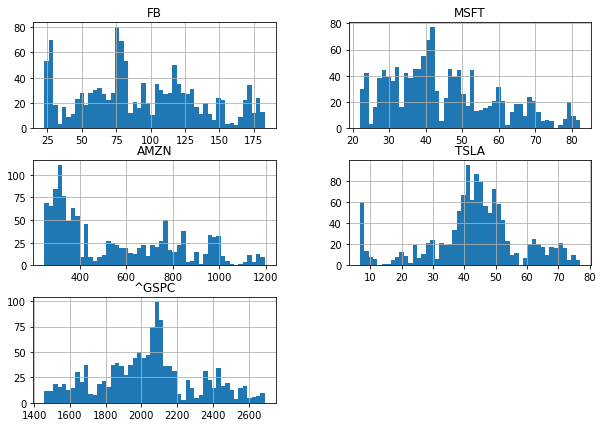

In [9]:
data2.hist(bins=50, figsize=(10,7))

Ahora obtendremos los rendimientos diarios para los activos y también veremos su distribución.

<AxesSubplot:xlabel='Date'>

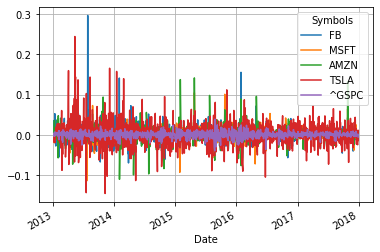

In [10]:
R = ((data2 - data2.shift())/data2.shift()).dropna()
R.plot(grid=True)

array([[<AxesSubplot:title={'center':'FB'}>,
        <AxesSubplot:title={'center':'MSFT'}>],
       [<AxesSubplot:title={'center':'AMZN'}>,
        <AxesSubplot:title={'center':'TSLA'}>],
       [<AxesSubplot:title={'center':'^GSPC'}>, <AxesSubplot:>]],
      dtype=object)

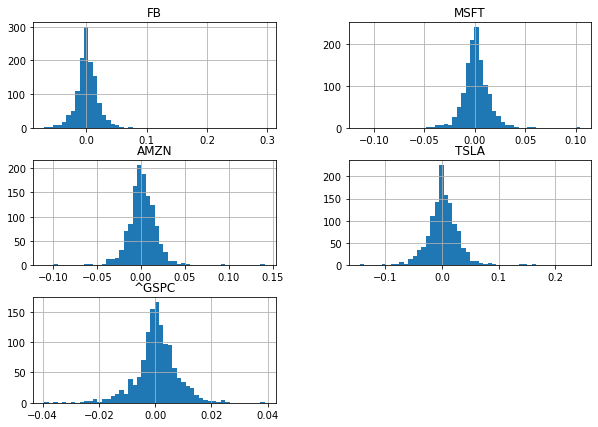

In [11]:
R.hist(bins=50, figsize=(10,7))

In [12]:
R.describe()

Symbols,FB,MSFT,AMZN,TSLA,^GSPC
count,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000
mean,0.001662,0.001104,0.001371,0.002170,0.000508
std,0.020250,0.014082,0.018316,0.029862,0.007464
min,-0.069348,-0.113995,-0.109972,-0.145071,-0.039414
25%,-0.008143,-0.005759,-0.007365,-0.012430,-0.002835
50%,0.001081,0.000516,0.000921,0.001179,0.000531
75%,0.011132,0.007752,0.010491,0.016736,0.004570
max,0.296115,0.104522,0.141311,0.243951,0.039034


Primero generamos sus medias y desviaciones estandar. Luego generamos las fechas en las que queremos predecir los datos, primero veremos que tan preciso es para los años de 2018 a la fecha actual

In [ ]:
media_FB = R["FB"].mean()
std_FB = R["FB"].std()
media_MSFT = R["MSFT"].mean()
std_MSFT = R["MSFT"].std()
media_AMZN = R["MSFT"].mean()
std_AMZN = R["MSFT"].std()
media_TSLA, std_TSLA, media_NFLX, std_NFLX

In [ ]:
def simR(names, means, stds, start, end, N):
    sims = {}
    fechas = pd.date_range(start=start, end=end)
    for name, mean, std in zip(names, means, stds):
        R_sim = np.random.normal(mean, std, size=(len(fechas), N))
        sims[name] = pd.DataFrame(data=R_sim, index=fechas)
    return sims

## Conclusiones

1. Al estar creciendo el deflactor con una curva algo pronunciada podemos decir que el valor del PIB con respecto de 2013 esta siendo cada vez menor, y el crecimiento se está queando estancado.
2. Los modelos de predicción aquí utilizados en comparación con los del INEGI no son tan distintos en cuanto a resultados por lo que podemos concluir que los modelos polinomiales son efectivos en muchas ocasiones practicas.